In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import time

In [3]:
# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
# Tampilkan beberapa data pertama
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Deskripsi dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Cek informasi umum tentang dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# Cek missing value
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [11]:
# Hapus kolom id
df.drop('id', axis=1, inplace=True)


In [12]:
# Tangani missing value pada bmi
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [13]:
# Cek missing value
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [14]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

In [15]:
# Label encoding untuk kolom kategorikal
le = LabelEncoder()
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
# Buat fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [17]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
print("Total data:", len(df))
print("Train set:", len(X_train))
print("Test set :", len(X_test))

Total data: 5110
Train set: 4088
Test set : 1022


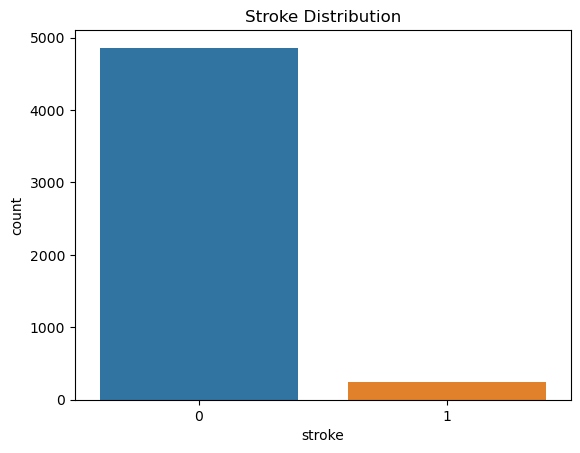

In [19]:
# Visualisasi distribusi target
sns.countplot(x = df['stroke'])
plt.title('Stroke Distribution')
plt.show()

In [22]:
# ----------------------------------
# MODEL 1: Random Forest
# ----------------------------------
start_rf = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:,1]
end_rf = time.time()

# ----------------------------------
# MODEL 2: Naive Bayes
# ----------------------------------
start_nb = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_probs = nb.predict_proba(X_test)[:,1]
end_nb = time.time()

In [23]:
# ----------------------------------
# EVALUASI
# ----------------------------------
def evaluate_model(name, y_true, y_pred, y_probs, time_taken):
    print(f"\n=== {name} ===")
    print(f"Akurasi      : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision    : {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall       : {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1-Score     : {f1_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Waktu (detik): {time_taken:.4f}")
    print(f"ROC-AUC      : {roc_auc_score(y_true, y_probs):.4f}")
    print(f"Avg Precision: {average_precision_score(y_true, y_probs):.4f}")

evaluate_model("Random Forest", y_test, rf_pred, rf_probs, end_rf - start_rf)
evaluate_model("Naive Bayes", y_test, nb_pred, nb_probs, end_nb - start_nb)


=== Random Forest ===
Akurasi      : 0.9491
Precision    : 0.0000
Recall       : 0.0000
F1-Score     : 0.0000
Waktu (detik): 0.6395
ROC-AUC      : 0.8011
Avg Precision: 0.1751

=== Naive Bayes ===
Akurasi      : 0.8679
Precision    : 0.1654
Recall       : 0.4200
F1-Score     : 0.2373
Waktu (detik): 0.0019
ROC-AUC      : 0.8033
Avg Precision: 0.1933


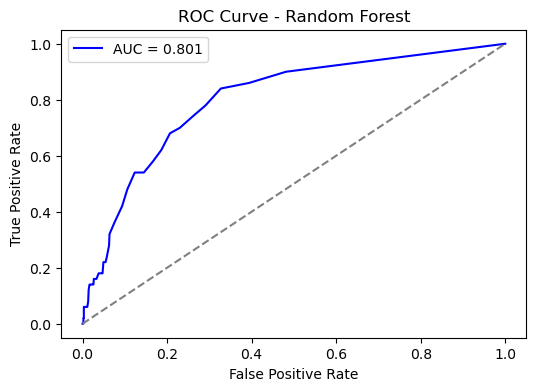

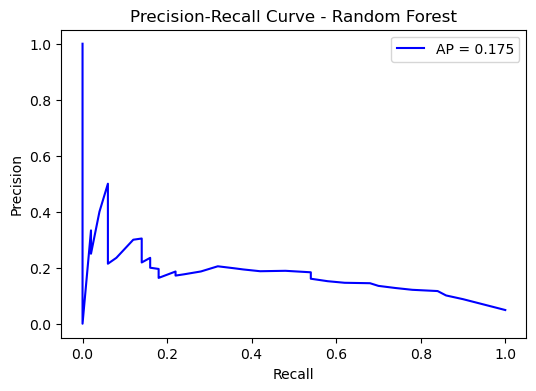

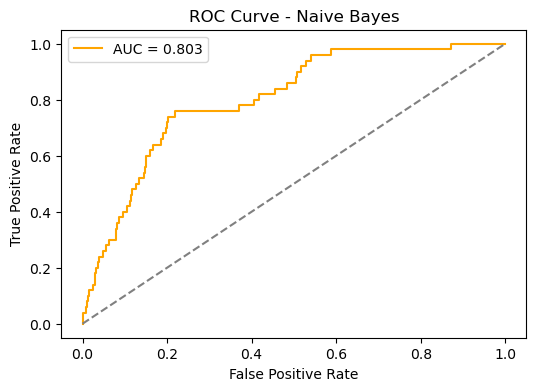

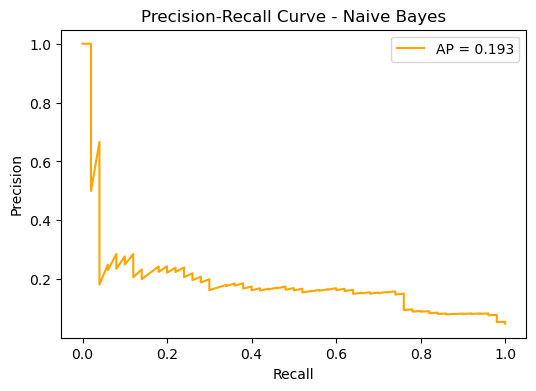

In [24]:
# ----------------------------------
# CURVE VISUALIZATION
# ----------------------------------
def plot_curves(y_true, y_probs, name, color):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_probs):.3f}", color=color)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    ap = average_precision_score(y_true, y_probs)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label=f'AP = {ap:.3f}', color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()
    plt.show()

plot_curves(y_test, rf_probs, "Random Forest", "blue")
plot_curves(y_test, nb_probs, "Naive Bayes", "orange")

In [25]:
# ----------------------------------
# THRESHOLDING (Optional: Mendemonstrasikan prediksi minoritas)
# ----------------------------------
print("\n=== Random Forest (Custom Threshold 0.2) ===")
thresh_rf = 0.2
rf_pred_thresh = (rf_probs > thresh_rf).astype(int)
print(f"Akurasi      : {accuracy_score(y_test, rf_pred_thresh):.4f}")
print(f"Precision    : {precision_score(y_test, rf_pred_thresh, zero_division=0):.4f}")
print(f"Recall       : {recall_score(y_test, rf_pred_thresh, zero_division=0):.4f}")
print(f"F1-Score     : {f1_score(y_test, rf_pred_thresh, zero_division=0):.4f}")


print("\n=== Naive Bayes (Custom Threshold 0.2) ===")
thresh_nb = 0.2
nb_pred_thresh = (nb_probs > thresh_nb).astype(int)
print(f"Akurasi      : {accuracy_score(y_test, nb_pred_thresh):.4f}")
print(f"Precision    : {precision_score(y_test, nb_pred_thresh, zero_division=0):.4f}")
print(f"Recall       : {recall_score(y_test, nb_pred_thresh, zero_division=0):.4f}")
print(f"F1-Score     : {f1_score(y_test, nb_pred_thresh, zero_division=0):.4f}")


# Catatan:
# - class_weight='balanced_subsample' pada RandomForest membantu agar model lebih memperhatikan kelas minoritas tanpa mengubah distribusi data.
# - Custom threshold menunjukkan bahwa dengan menurunkan threshold, recall terhadap kelas minoritas bisa naik (tapi precision mungkin turun).
# - Ini solusi tanpa oversampling/undersampling (tanpa membuat data seimbang secara eksplisit).


=== Random Forest (Custom Threshold 0.2) ===
Akurasi      : 0.9149
Precision    : 0.1636
Recall       : 0.1800
F1-Score     : 0.1714

=== Naive Bayes (Custom Threshold 0.2) ===
Akurasi      : 0.8405
Precision    : 0.1576
Recall       : 0.5200
F1-Score     : 0.2419



Confusion Matrix (Random Forest):
[[970   2]
 [ 50   0]]


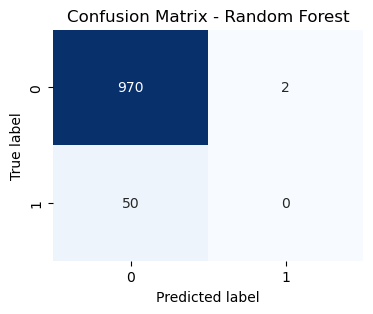


Confusion Matrix (Naive Bayes):
[[866 106]
 [ 29  21]]


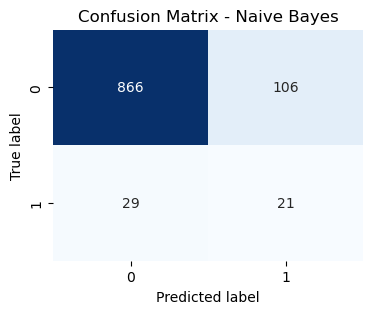

In [27]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix ({title}):")
    print(cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Tampilkan confusion matrix untuk Random Forest
show_confusion_matrix(y_test, rf_pred, "Random Forest")

# Tampilkan confusion matrix untuk Naive Bayes
show_confusion_matrix(y_test, nb_pred, "Naive Bayes")